In [1]:
import networkx as nx
import numpy as np
import osmnx as ox
import functions 
import random
import Path_finder

In [2]:
# This location is 1 km round the location : 
G = ox.project_graph(ox.graph_from_point((-0.16509, -78.47888 ), dist=1000, network_type='drive'))
G = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

# get data frame
df = nx.to_pandas_edgelist( G )

In [3]:
#get list of nodes
list_nodes = list(G.nodes)

# get traffic ligths matrix 
matriz = functions.matriz_de_semaforos()

# get random initial and final nodes 
#i , f  = functions.choose_route(list_nodes , G)

i , f = 107 , 294

# get the route the agent found
route , path = Path_finder.path_finder(i , f , G)

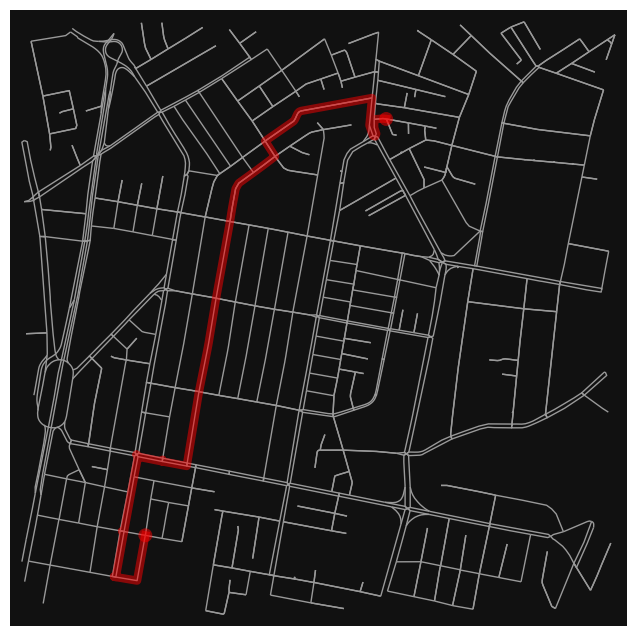

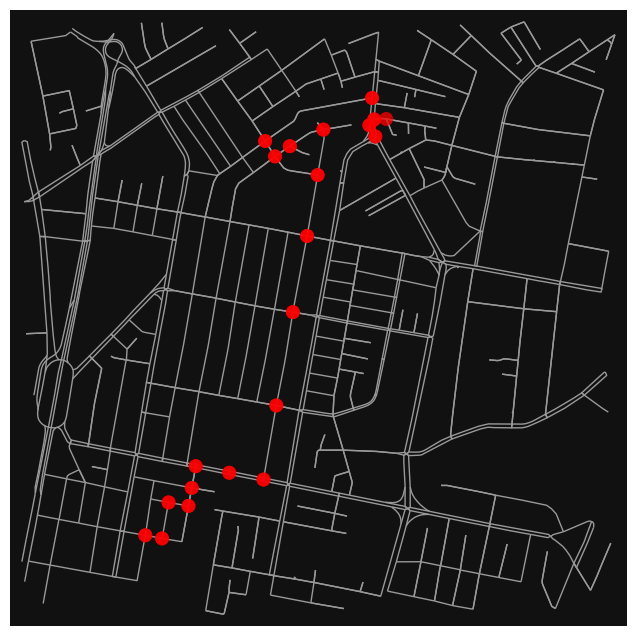

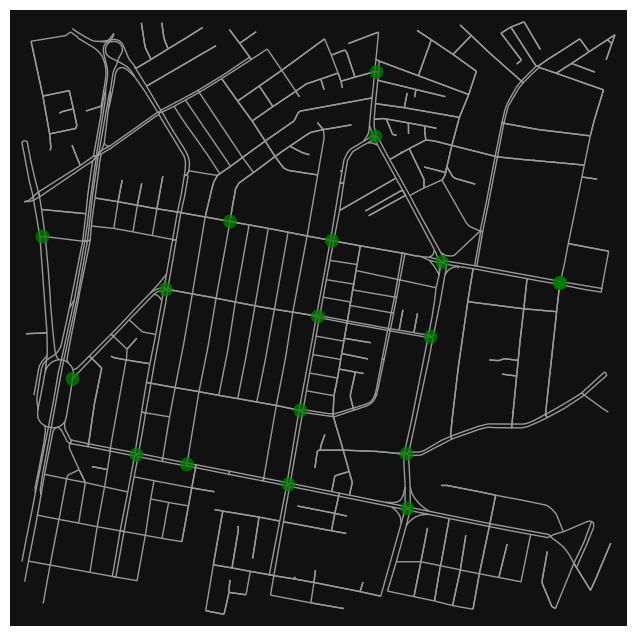

In [4]:
# cleaning the path the agent find 
real_path = functions.get_path(route , i)

# get final path  
real_path = functions.fix_dict(real_path , i , f , path)

# plotting the shotrtest path given by netwrokX 
functions.plot_node( i, f , G )

# plotting the path the agent discovered 
functions.plot_path(real_path , f , G)

# plot of traffic lights in the map
functions.plot_traffic_lights(matriz , G)

In [5]:
# get traffics lights on the path  
semaforos_a = functions.get_trafficlights(matriz , real_path)

In [6]:
real_path

{107: 110,
 110: 108,
 108: 89,
 89: 88,
 88: 92,
 92: 360,
 360: 155,
 155: 162,
 162: 163,
 163: 240,
 240: 83,
 83: 237,
 237: 82,
 82: 78,
 78: 76,
 76: 79,
 79: 235,
 235: 242,
 242: 293,
 293: 294}

In [7]:
# gettin probabilities of stoping. Getting total time of travel 

total_t = 0
tiempo_parada = []

for node_i , node_f in real_path.items():
    
    # calculating  time of travel 
    time = functions.get_time (node_i , node_f , df)

    # check traffic lights in the path 
    if node_f in semaforos_a:

        # get proability 
        stop_p , stop_t =  functions.probability_p (time)
        
        # stoping
        if stop_p >= 0.80: 
            print("me voy a detener en el semaforo" , node_f)

            # getting the time we need to wait in the traffci light
            tiempo_parada.append(stop_p*stop_t)

            print("me voy a detener por %d  segundos"  %(stop_p*stop_t*60) )

        if stop_p < 0.80:
            print("El semafro %d esta en verde. Avanzo" % (stop_p ))

    #print(time)
    total_t += time
total = total_t + sum(tiempo_parada)

print("el tiempo total del viaje fue de" , round(total) , "minutos" )

me voy a detener en el semaforo 242
me voy a detener por 3353  segundos
el tiempo total del viaje fue de 67 minutos


In [8]:
real_path

{107: 110,
 110: 108,
 108: 89,
 89: 88,
 88: 92,
 92: 360,
 360: 155,
 155: 162,
 162: 163,
 163: 240,
 240: 83,
 83: 237,
 237: 82,
 82: 78,
 78: 76,
 76: 79,
 79: 235,
 235: 242,
 242: 293,
 293: 294}